In [7]:
# Import required libraries
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Load the dataset from TFDS
dataset_name = 'oxford_iiit_pet'
IMG_SIZE = 128  # Resize images to 128x128

# Load dataset and split into training and test sets
(ds_train, ds_test), ds_info = tfds.load(
    dataset_name,
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# Define a minimal preprocessing function to only resize images
def resize_images(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))  # Resize only, no normalization
    return image, label

# Apply resizing and batch datasets
ds_train = ds_train.map(resize_images).batch(len(ds_train))
ds_test = ds_test.map(resize_images).batch(len(ds_test))

# Retrieve data as NumPy arrays for X_train, y_train, X_test, y_test
X_train, y_train = next(iter(ds_train))
X_test, y_test = next(iter(ds_test))

# Build the CNN model
model = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    Dense(ds_info.features['label'].num_classes, activation='softmax')  # Adjust to number of classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


Epoch 1/10
92/92 [==============================] - 15s 162ms/step - loss: 7.1059 - accuracy: 0.0245 - val_loss: 3.6117 - val_accuracy: 0.0190
Epoch 2/10
92/92 [==============================] - 15s 160ms/step - loss: 3.6111 - accuracy: 0.0258 - val_loss: 3.6125 - val_accuracy: 0.0190
Epoch 3/10
92/92 [==============================] - 15s 161ms/step - loss: 3.6108 - accuracy: 0.0265 - val_loss: 3.6132 - val_accuracy: 0.0190
Epoch 4/10
92/92 [==============================] - 15s 159ms/step - loss: 3.6107 - accuracy: 0.0292 - val_loss: 3.6138 - val_accuracy: 0.0190
Epoch 5/10
92/92 [==============================] - 15s 162ms/step - loss: 3.6106 - accuracy: 0.0285 - val_loss: 3.6145 - val_accuracy: 0.0190
Epoch 6/10
92/92 [==============================] - 15s 160ms/step - loss: 3.6105 - accuracy: 0.0258 - val_loss: 3.6151 - val_accuracy: 0.0177
Epoch 7/10
92/92 [==============================] - 14s 157ms/step - loss: 3.6104 - accuracy: 0.0296 - val_loss: 3.6156 - val_accuracy: 0.0177

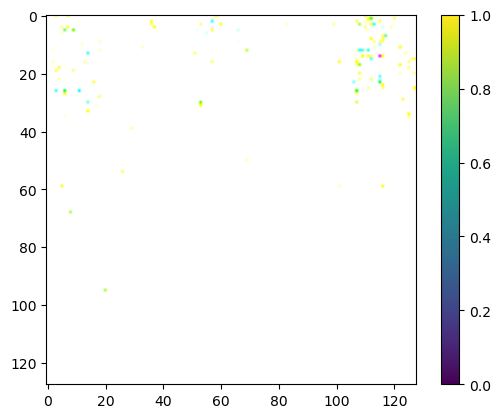

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(X_train[1])
plt.colorbar()